In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
w=pd.read_csv('C:/Users/hp/Downloads/Github/dataset1-master/winequality-red.csv')
wine=pd.DataFrame(w)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [7]:
for col in wine.columns:
    if wine[col].skew()>0.55:
        wine[col]=np.log1p(wine[col])

In [8]:
wine.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.215842,0.417173,0.270976,1.218131,0.083038,2.639013,3.634750,0.996747,3.311113,0.501073,2.431458,5.636023
std,0.178100,0.114926,0.194801,0.269969,0.038991,0.623790,0.682575,0.001887,0.154386,0.093731,0.090434,0.807569
min,1.722767,0.113329,0.000000,0.641854,0.011929,0.693147,1.945910,0.990070,2.740000,0.285179,2.240710,3.000000
25%,2.091864,0.329304,0.090000,1.064711,0.067659,2.079442,3.135494,0.995600,3.210000,0.438255,2.351375,5.000000
50%,2.186051,0.418710,0.260000,1.163151,0.076035,2.708050,3.663562,0.996750,3.310000,0.482426,2.415914,6.000000
75%,2.322388,0.494696,0.420000,1.280934,0.086178,3.091042,4.143135,0.997835,3.400000,0.548121,2.493205,6.000000
max,2.827314,0.947789,1.000000,2.803360,0.476855,4.290459,5.669881,1.003690,4.010000,1.098612,2.766319,8.000000


In [10]:
wine.shape

(1599, 12)

In [11]:
x=wine.drop('quality',axis=1)
y=wine['quality']

In [12]:
import warnings
warnings.filterwarnings('ignore')
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r_state,'at',final_r)

In [23]:
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('mean_squared_error',mean_squared_error(y_test,pred))
    print('mean_absolute_error',mean_absolute_error(y_test,pred))
    print('r2_score',r2_score(y_test,pred))

In [24]:
def cross_val(alg):
    cvscore=cross_val_score(alg,x,y,cv=5)
    print(cvscore)
    print(cvscore.mean())
    print(cvscore.std())

In [25]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.39999741563794966 at 83


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=83)
model(lm)

mean_squared_error 0.4154266343883295
mean_absolute_error 0.4990527503554861
r2_score 0.39999741563794966


In [27]:
cross_val(lm)

[0.153675   0.30557717 0.35016052 0.38225151 0.27676794]
0.29368642806092804
0.07882121562848834


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.200773769223329 at 78


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=89)
model(dtc)

mean_squared_error 0.6609848484848485
mean_absolute_error 0.44507575757575757
r2_score 0.1368143939216505


In [30]:
cross_val(dtc)

[0.50931677 0.43613707 0.4517134  0.51886792 0.46056782]
0.4753205970696411
0.03274874798097506


In [31]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
random(knr)

0.2761550652634579 at 62


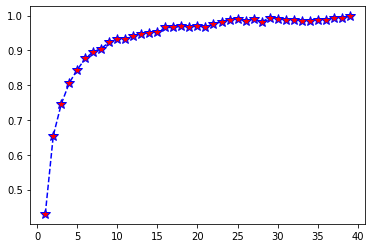

In [34]:
error=[]
for i in range(1,40):
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    error.append(np.mean(pred!=y_test))
plt.plot(range(1,40),error,marker='*',markersize=10,markerfacecolor='red',linestyle='dashed',color='blue')

In [42]:
knr=KNeighborsRegressor(n_neighbors=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=62)
model(knr)

mean_squared_error 0.6382575757575758
mean_absolute_error 0.5018939393939394
r2_score -0.05618177609202779


In [38]:
from sklearn.svm import SVR
svm=SVR()
random(svm)

0.3740919066957745 at 83


In [39]:
parameters={'kernel':['rbf','linear'],'C':[1,10,100,1000]}
grd=GridSearchCV(svm,parameters)
grd.fit(x_train,y_train)
grd.best_params_

{'C': 100, 'kernel': 'linear'}

In [47]:
svm=SVR(kernel='linear')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=83)
model(svm)

mean_squared_error 0.42175443355497944
mean_absolute_error 0.4912951647487056
r2_score 0.39085814641679284


In [48]:
cross_val(svm)

[0.16616752 0.31285397 0.34807122 0.3612495  0.27410885]
0.29249021259060654
0.07003865560059601


In [50]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
random(rfr)

0.4814894589385419 at 69


In [45]:
parameters={'n_estimators':[10,100,500,1000]}
gd=GridSearchCV(rfr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 1000}

In [51]:
rfr=RandomForestRegressor(n_estimators=1000)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=69)
model(rfr)

mean_squared_error 0.36047147727272727
mean_absolute_error 0.43709848484848485
r2_score 0.500796390009339


In [52]:
cross_val(rfr)

[0.25449775 0.35673448 0.36774235 0.3265067  0.28611983]
0.31832022056453285
0.04265065737254027


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
random(gbr)

0.454873776697592 at 78


In [55]:
parameters={'learning_rate':[1,0.1,0.001,0.01],"n_estimators":[10,100,500,1000]}
grid=GridSearchCV(gbr,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [56]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=78)
model(gbr)

mean_squared_error 0.41732135849227553
mean_absolute_error 0.496431536295343
r2_score 0.43736087819948466


Random forest regressor has best score over all the algorithms

In [57]:
from sklearn.externals import joblib
joblib.dump(rfr,'winequality.pkl')

['winequality.pkl']